#  Assessing Market Opportunities for Alpaca Wool Scarves

In this activity, you’ll use time series forecasting to analyze Google Trends data. The purpose will be to validate market opportunities to help the Aymara indigenous people in Bolivia export alpaca wool scarves to different countries or regions.

You’ll continue collaborating with the International Co-operative Alliance. But now, you’ll use Prophet to validate prospective market opportunities

Instructions

1. Read the Google Trends data into a Pandas DataFrame, and then plot the general trends.

2. Prepare the data to fit the Prophet model. Create two new DataFrames: one for Canada and another for Uruguay. Recall setting the column names to “ds” for the dates and “y” for the trend values.

3. Create two Prophet models, one for each country.

4. Fit the Prophet models.

5. Use the `make_future_dataframe` function to forecast one year of trend dates.

    > **Hint** Google Trends data is collected weekly. So, set the `freq` parameter to `W`, and set `periods=52` (because one year has 52 weeks).

6. Predict the future trends data by using the `predict` method for both the Canada and Uruguay models. 

7. Plot Prophet’s predictions by using the `plot` function. Pass the forecasts for Canada and Uruguay, respectively, as the parameters. 

8. Analyze the forecast results by plotting the forecast DataFrame's “yhat”, “yhat_lower”, and “yhat_upper” columns for each the Canadian and Uruguay models. Set the “ds” column as the DataFrame index before creating these plots.

9. Use the `plot_component` function from the Prophet models to analyze the patterns of the Google Trends times series data for the Canada and Uruguay models. Be sure to reset the index by converting “ds” back to a column before creating these plots. 

References

[Prophet Python API](https://facebook.github.io/prophet/docs/quick_start.html#python-api)

[Pandas rename function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)


In [1]:
# Install the required libraries
!pip install pystan
!pip install fbprophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from pathlib import Path
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

Importing plotly failed. Interactive plots will not work.


## Step 1: Read the Google Trends data into a Pandas DataFrame, and then plot the general trends.

In [3]:
# Read the data from the scarf-google-trends-data.csv file into a Pandas DataFrame
#from google.colab import files
#uploaded = files.upload()

df_alpaca = pd.read_csv(Path("../Resources/scarf-google-trends-data.csv"))

# Review the DataFrame
df_alpaca.head()

,week,canada,uruguay
0,11/8/15,74,17
1,11/15/15,81,17
2,11/22/15,94,17
3,11/29/15,92,0
4,12/6/15,87,18


## Step 2: Prepare the data to fit the Prophet model. Create two new DataFrames: one for Canada and another for Uruguay. Recall setting the column names to “ds” for the dates and “y” for the trend values.


In [4]:
# Create a DataFrame for Canada to include the week and canada columns
df_canada = df_alpaca[['week','canada']]
df_canada
# Rename the columns to the Prophet model syntax 
df_canada = df_canada.rename(columns={"week":"ds", "canada":"y"})

# Review the Canada DataFrame
# YOUR CODE HERE
df_canada.head()

,ds,y
0,11/8/15,74
1,11/15/15,81
2,11/22/15,94
3,11/29/15,92
4,12/6/15,87


In [5]:
# # Create a DataFrame for Uruguay to include the week and uruguay columns
df_uruguay =  df_alpaca[['week','canada']]

# Rename the columns to the Prophet model syntax 
df_uruguay = df_uruguay.rename(columns={"week":"ds", "canada":"y"})

# Review the Uruguay DataFrame
# YOUR CODE HERE
df_uruguay.head()

,ds,y
0,11/8/15,74
1,11/15/15,81
2,11/22/15,94
3,11/29/15,92
4,12/6/15,87


## Step 3: Create two Prophet models, one for each country

In [10]:
# Create a Prophet model for Canada
model_canada = Prophet()

In [11]:
# Create a Prophet model for Uruguay
model_uruguay = Prophet()


## Step 4: Fit the Prophet models

In [12]:
# Fit the Canada Prophet model

model_canada.fit(df_canada)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -12.2351


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      89       648.259   0.000836512       65.3766    1.75e-05       0.001      203  LS failed, Hessian reset 
      99       648.284   0.000233273       52.0432           1           1      216   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       648.322   2.62939e-05       31.9498   5.196e-07       0.001      287  LS failed, Hessian reset 
     147       648.325   1.57889e-05       47.2078   3.151e-07       0.001      364  LS failed, Hessian reset 
     179       648.327   3.87321e-08       40.9099    1.02e-09       0.001      470  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [13]:
# Fit the Uruguay Prophet model

model_uruguay.fit(df_uruguay)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -12.2351


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      89       648.259   0.000836512       65.3766    1.75e-05       0.001      203  LS failed, Hessian reset 
      99       648.284   0.000233273       52.0432           1           1      216   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       648.322   2.62939e-05       31.9498   5.196e-07       0.001      287  LS failed, Hessian reset 
     147       648.325   1.57889e-05       47.2078   3.151e-07       0.001      364  LS failed, Hessian reset 
     179       648.327   3.87321e-08       40.9099    1.02e-09       0.001      470  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


## Step 5: Use the `make_future_dataframe` function to forecast one year of trend dates.

> **Hint** Google Trends data is collected weekly. So, set the `freq` parameter to `W`, and set `periods=52` (because one year has 52 weeks).


In [14]:
# Forecast one year of weekly future trends data for Canada 
future_canada = model_canada.make_future_dataframe(periods=52, freq="W")
# Display the last five rows of the future_canada DataFrame
future_canada.tail(5)


,ds
307,2021-09-26
308,2021-10-03
309,2021-10-10
310,2021-10-17
311,2021-10-24


In [15]:
# Forecast one year of weekly future trends data for Uruguay 
future_uruguay = model_uruguay.make_future_dataframe(periods=52, freq="W")

# Display the last five rows of the future_uruguay DataFrame
future_uruguay.tail(5)

,ds
307,2021-09-26
308,2021-10-03
309,2021-10-10
310,2021-10-17
311,2021-10-24


## Step 6: Predict the future trends data by using the `predict` method for both the Canada and Uruguay models. 

In [25]:
# Make predictions for Canada using the future_canada DataFrame
forecast_canada = model_canada.predict(future_canada)

# Display the first five rows of the forecast_canada DataFrame
# YOUR CODE HERE
forecast_canada.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-08,46.043182,68.515550,80.990036,46.043182,46.043182,28.547375,28.547375,28.547375,28.547375,28.547375,28.547375,0.0,0.0,0.0,74.590557
1,2015-11-15,45.946990,72.833040,85.245230,45.946990,45.946990,32.939119,32.939119,32.939119,32.939119,32.939119,32.939119,0.0,0.0,0.0,78.886109
2,2015-11-22,45.850798,75.408589,88.457641,45.850798,45.850798,36.024510,36.024510,36.024510,36.024510,36.024510,36.024510,0.0,0.0,0.0,81.875308
3,2015-11-29,45.754607,78.029347,91.168327,45.754607,45.754607,38.865683,38.865683,38.865683,38.865683,38.865683,38.865683,0.0,0.0,0.0,84.620289
4,2015-12-06,45.658415,81.236179,93.711169,45.658415,45.658415,41.702095,41.702095,41.702095,41.702095,41.702095,41.702095,0.0,0.0,0.0,87.360510


In [19]:
# Make predictions for Uruguay using the future_uruguay DataFrame
forecast_uruguay = model_uruguay.predict(future_uruguay)

# Display the first five rows of the forecast_uruguay DataFrame
# YOUR CODE HERE
forecast_uruguay.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-08,46.043182,68.340251,80.729926,46.043182,46.043182,28.547375,28.547375,28.547375,28.547375,28.547375,28.547375,0.0,0.0,0.0,74.590557
1,2015-11-15,45.946990,73.028930,85.364170,45.946990,45.946990,32.939119,32.939119,32.939119,32.939119,32.939119,32.939119,0.0,0.0,0.0,78.886109
2,2015-11-22,45.850798,75.270541,88.281610,45.850798,45.850798,36.024510,36.024510,36.024510,36.024510,36.024510,36.024510,0.0,0.0,0.0,81.875308
3,2015-11-29,45.754607,78.532167,91.113167,45.754607,45.754607,38.865683,38.865683,38.865683,38.865683,38.865683,38.865683,0.0,0.0,0.0,84.620289
4,2015-12-06,45.658415,81.396106,93.578852,45.658415,45.658415,41.702095,41.702095,41.702095,41.702095,41.702095,41.702095,0.0,0.0,0.0,87.360510


## Step 7: Plot Prophet’s predictions by using the `plot` function. Pass the forecasts for Canada and Uruguay, respectively, as the parameters. 

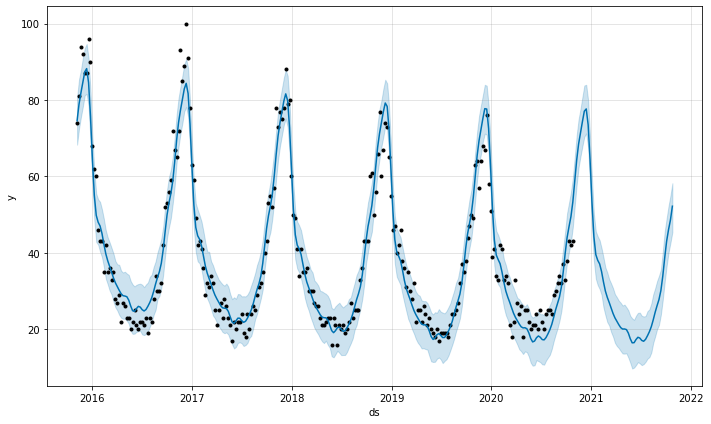

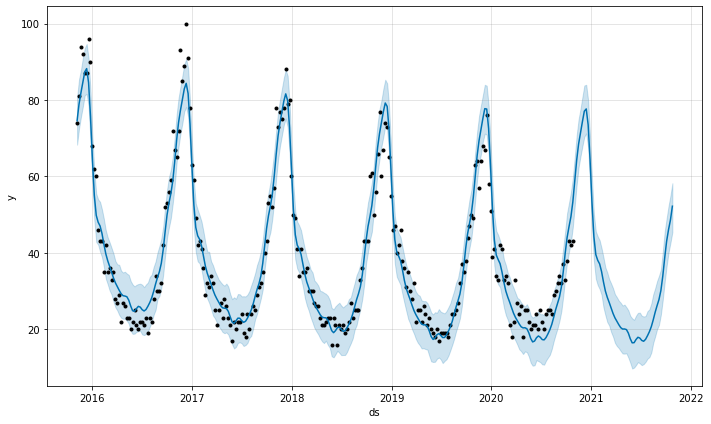

In [20]:
# Plot the Prophet predictions for Canada 
# YOUR CODE HERE
model_canada.plot(forecast_canada)

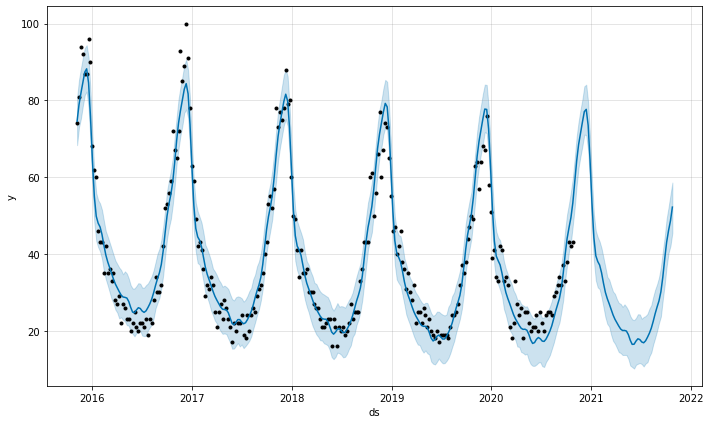

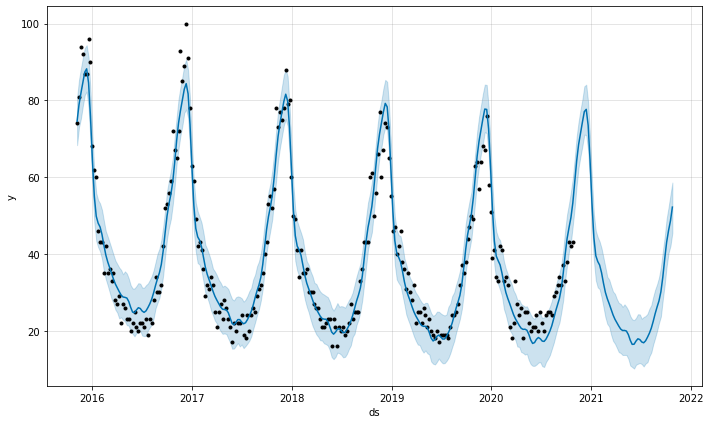

In [21]:
# Plot the Prophet predictions for Uruguay 
# YOUR CODE HERE
model_uruguay.plot(forecast_uruguay)

## Step 8: Analyze the forecast results by plotting the forecast DataFrame's “yhat”, “yhat_lower”, and “yhat_upper” columns for each the Canadian and Uruguay models. Set the “ds” column as the DataFrame index before creating these plots.

In [40]:
# Set the index in the forecast_canada DataFrame to the ds datetime column 
forecast_canada = forecast_canada.set_index('ds')

# Display the forecast_canada DataFrame
forecast_canada.head()

,level_0,index,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,
2015-11-08,0,0,46.043182,68.515550,80.990036,46.043182,46.043182,28.547375,28.547375,28.547375,28.547375,28.547375,28.547375,0.0,0.0,0.0,74.590557
2015-11-15,1,1,45.946990,72.833040,85.245230,45.946990,45.946990,32.939119,32.939119,32.939119,32.939119,32.939119,32.939119,0.0,0.0,0.0,78.886109
2015-11-22,2,2,45.850798,75.408589,88.457641,45.850798,45.850798,36.024510,36.024510,36.024510,36.024510,36.024510,36.024510,0.0,0.0,0.0,81.875308
2015-11-29,3,3,45.754607,78.029347,91.168327,45.754607,45.754607,38.865683,38.865683,38.865683,38.865683,38.865683,38.865683,0.0,0.0,0.0,84.620289
2015-12-06,4,4,45.658415,81.236179,93.711169,45.658415,45.658415,41.702095,41.702095,41.702095,41.702095,41.702095,41.702095,0.0,0.0,0.0,87.360510


<AxesSubplot:>

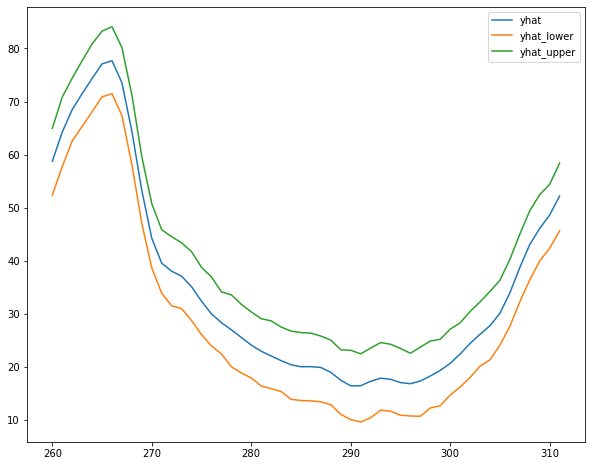

In [36]:
# Plot predictions for our forecast_canada DataFrame for the 52 week period 
forecast_canada[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-52:,:].plot(figsize = (10,8))

In [31]:
# Set the index in the forecast_uruguay DataFrame to the ds datetime column 
forecast_uruguay = forecast_uruguay.set_index('ds')

# Display the forecast_uruguay DataFrame
forecast_uruguay.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2015-11-08,46.043182,68.340251,80.729926,46.043182,46.043182,28.547375,28.547375,28.547375,28.547375,28.547375,28.547375,0.0,0.0,0.0,74.590557
2015-11-15,45.946990,73.028930,85.364170,45.946990,45.946990,32.939119,32.939119,32.939119,32.939119,32.939119,32.939119,0.0,0.0,0.0,78.886109
2015-11-22,45.850798,75.270541,88.281610,45.850798,45.850798,36.024510,36.024510,36.024510,36.024510,36.024510,36.024510,0.0,0.0,0.0,81.875308
2015-11-29,45.754607,78.532167,91.113167,45.754607,45.754607,38.865683,38.865683,38.865683,38.865683,38.865683,38.865683,0.0,0.0,0.0,84.620289
2015-12-06,45.658415,81.396106,93.578852,45.658415,45.658415,41.702095,41.702095,41.702095,41.702095,41.702095,41.702095,0.0,0.0,0.0,87.360510


<AxesSubplot:xlabel='ds'>

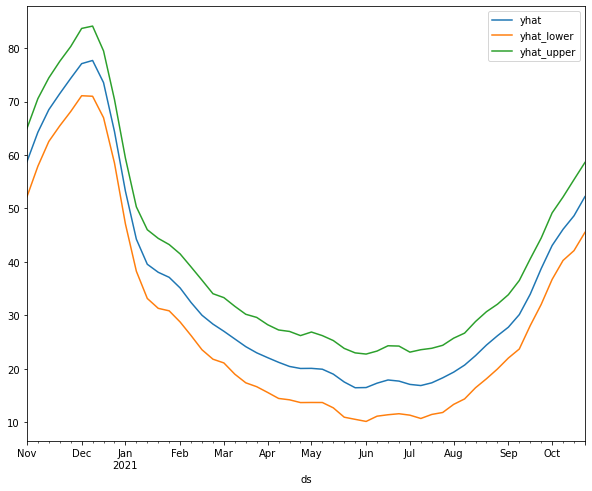

In [37]:
# Plot predictions for our forecast_uruguay DataFrame for the 52 week period 
# YOUR CODE HERE
forecast_uruguay[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-52:,:].plot(figsize = (10,8))

## Step 9: Use the `plot_component` function from the Prophet models to analyze the patterns of the Google Trends times series data for the Canada and Uruguay models. Be sure to reset the index by converting “ds” back to a column before creating these plots.

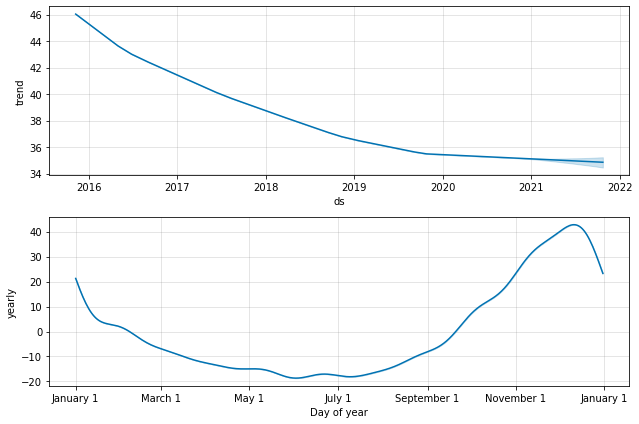

In [41]:
# Reset the index in the forecast_canada DataFrame
forecast_canada = forecast_canada.reset_index()

# Use the plot_components function to visualize the forecast results 
# for the forecast_canada DataFrame
fig_canada = model_canada.plot_components(forecast_canada)

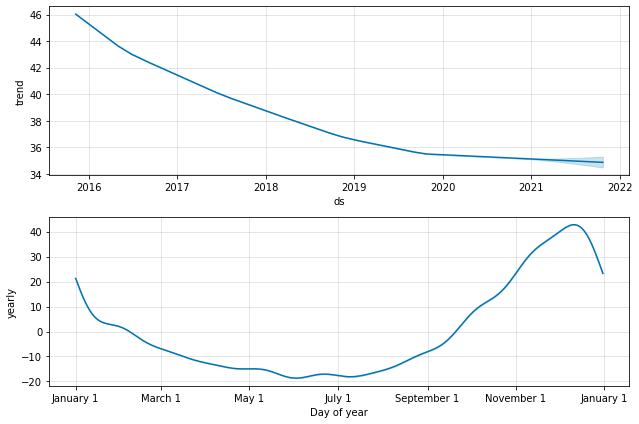

In [42]:
# Reset the index in the forecast_uruguay DataFrame
forecast_uruguay = forecast_uruguay.reset_index()

# Use the plot_components function to visualize the forecast results 
# for the forecast_uruguay DataFrame
fig_uruguay = model_uruguay.plot_components(forecast_uruguay)